In [2]:
import scipy.io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

PART 1 ---> READING DATA

In [3]:
data = pd.read_csv('Musk_Dataset.csv')
print(data.columns)

Index(['ID', 'molecule_name', 'conformation_name', 'f1', 'f2', 'f3', 'f4',
       'f5', 'f6', 'f7',
       ...
       'f158', 'f159', 'f160', 'f161', 'f162', 'f163', 'f164', 'f165', 'f166',
       'class'],
      dtype='object', length=170)


In [4]:
data.shape

(6598, 170)

In [5]:
data.head()

,ID,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
0,1,MUSK-211,211_1+1,46,-108,-60,-69,-117,49,38,...,-308,52,-7,39,126,156,-50,-112,96,1
1,2,MUSK-211,211_1+10,41,-188,-145,22,-117,-6,57,...,-59,-2,52,103,136,169,-61,-136,79,1
2,3,MUSK-211,211_1+11,46,-194,-145,28,-117,73,57,...,-134,-154,57,143,142,165,-67,-145,39,1
3,4,MUSK-211,211_1+12,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,136,168,-60,-135,80,1
4,5,MUSK-211,211_1+13,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,137,168,-60,-135,80,1


In [6]:
data.describe()

,ID,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
count,6598.00000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,...,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000
mean,3299.50000,58.945135,-119.128524,-73.146560,-0.628372,-103.533495,18.359806,-14.108821,-1.858290,-86.003031,...,-184.798272,-75.795696,-26.073204,64.616702,112.037739,201.760230,-47.488330,-150.259927,41.770233,0.154138
std,1904.82287,53.249007,90.813375,67.956235,80.444617,64.387559,80.593655,115.315673,90.372537,108.326676,...,107.819514,127.861271,69.727964,100.861935,72.835040,59.526751,55.069365,76.019023,94.116085,0.361108
min,1.00000,-31.000000,-199.000000,-167.000000,-114.000000,-118.000000,-183.000000,-171.000000,-225.000000,-245.000000,...,-328.000000,-219.000000,-136.000000,-120.000000,-69.000000,73.000000,-289.000000,-428.000000,-471.000000,0.000000
25%,1650.25000,37.000000,-193.000000,-137.000000,-70.000000,-117.000000,-28.000000,-159.000000,-85.000000,-217.000000,...,-272.000000,-205.000000,-70.000000,-18.000000,71.000000,166.000000,-68.000000,-179.000000,-9.000000,0.000000
50%,3299.50000,44.000000,-149.000000,-99.000000,-25.000000,-117.000000,33.000000,27.000000,19.000000,-40.000000,...,-234.000000,-131.000000,-21.000000,61.500000,107.000000,191.000000,-60.000000,-150.000000,27.000000,0.000000
75%,4948.75000,53.000000,-95.000000,-19.000000,42.000000,-116.000000,74.000000,57.000000,61.000000,-21.000000,...,-80.000000,52.000000,9.000000,149.000000,129.000000,215.000000,-45.000000,-120.000000,119.000000,0.000000
max,6598.00000,292.000000,95.000000,81.000000,161.000000,325.000000,200.000000,220.000000,320.000000,147.000000,...,94.000000,179.000000,192.000000,411.000000,355.000000,625.000000,295.000000,168.000000,367.000000,1.000000


In [7]:
columns = data.columns.tolist()
columns = [c for c in columns if c not in ["class", "ID", "molecule_name", "conformation_name"]]
target = "class" 
state = np.random.RandomState(42)
X = data[columns]
Y = data[target]
print(X.shape)
print(Y.shape)

(6598, 166)
(6598,)


In [8]:
X

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f157,f158,f159,f160,f161,f162,f163,f164,f165,f166
0,46,-108,-60,-69,-117,49,38,-161,-8,5,...,-244,-308,52,-7,39,126,156,-50,-112,96
1,41,-188,-145,22,-117,-6,57,-171,-39,-100,...,-235,-59,-2,52,103,136,169,-61,-136,79
2,46,-194,-145,28,-117,73,57,-168,-39,-22,...,-238,-134,-154,57,143,142,165,-67,-145,39
3,41,-188,-145,22,-117,-7,57,-170,-39,-99,...,-236,-60,-4,52,104,136,168,-60,-135,80
4,41,-188,-145,22,-117,-7,57,-170,-39,-99,...,-236,-60,-4,52,104,137,168,-60,-135,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6593,51,-123,-23,-108,-117,134,-160,82,-230,-28,...,62,-66,164,-14,-29,107,171,-44,-115,118
6594,44,-104,-19,-105,-117,142,-165,68,-225,-32,...,60,-51,166,-9,150,129,158,-66,-144,-5
6595,44,-102,-19,-104,-117,72,-165,65,-219,-12,...,-226,90,117,-8,150,130,159,-66,-144,-6
6596,51,-121,-23,-106,-117,63,-161,79,-224,-30,...,-238,86,99,-14,-31,106,171,-44,-116,117


In [9]:
Y

0       1
1       1
2       1
3       1
4       1
       ..
6593    0
6594    0
6595    0
6596    0
6597    0
Name: class, Length: 6598, dtype: int64

In [10]:
xData = X.values
xData

array([[  46, -108,  -60, ...,  -50, -112,   96],
       [  41, -188, -145, ...,  -61, -136,   79],
       [  46, -194, -145, ...,  -67, -145,   39],
       ...,
       [  44, -102,  -19, ...,  -66, -144,   -6],
       [  51, -121,  -23, ...,  -44, -116,  117],
       [  51, -122,  -23, ...,  -44, -115,  118]], dtype=int64)

In [11]:
yData = Y.values
yData

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

PART 2 ---> DATA PREPROCESSING USING PCA

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [13]:
scaler = StandardScaler()
X=scaler.fit_transform(X)
X

array([[-0.24312408,  0.12255207,  0.19347093, ..., -0.04561267,
         0.50333227,  0.5762445 ],
       [-0.33702966, -0.7584422 , -1.05742889, ..., -0.24537589,
         0.18759789,  0.39560282],
       [-0.24312408, -0.82451677, -1.05742889, ..., -0.35433764,
         0.06919749, -0.02943645],
       ...,
       [-0.28068632,  0.18862664,  0.79684613, ..., -0.33617735,
         0.08235309, -0.50760562],
       [-0.1492185 , -0.0206095 ,  0.73798026, ...,  0.06334909,
         0.45070987,  0.79939012],
       [-0.1492185 , -0.03162193,  0.73798026, ...,  0.06334909,
         0.46386547,  0.8100161 ]])

In [14]:
pca = PCA()
pca.fit_transform(X)

array([[ 1.21721976e+00,  9.43092712e+00, -2.06225652e+00, ...,
         1.59080507e-02,  1.57570230e-02, -7.34467514e-03],
       [-3.28238418e+00,  8.14204902e+00, -1.01710487e+00, ...,
         6.57542324e-03, -1.18670766e-02, -9.21463355e-03],
       [-3.40429754e+00,  7.77899686e+00,  1.73873893e+00, ...,
         7.38198388e-03, -5.65775202e-03, -9.75049270e-03],
       ...,
       [ 9.37517910e+00, -1.36311078e+00,  3.82467279e+00, ...,
        -7.49605591e-03, -4.18234307e-02, -1.37118131e-02],
       [ 9.44003787e+00, -6.33801099e-01, -2.26041925e+00, ...,
         8.53235679e-04, -4.48551947e-02, -1.99124020e-02],
       [ 8.82352893e+00, -1.63965432e+00, -1.90122091e+00, ...,
         1.10855374e-02,  2.54302951e-03, -6.45315861e-03]])

PART 3 + 4 ---> ALGORITHMS AND RESULT EVALUATION

ALGORITHM 1 - RANDOM FOREST CLASSIFIER 

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3) 

In [17]:
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

In [18]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9772727272727273


In [19]:
feature_imp = pd.Series(clf.feature_importances_).sort_values(ascending=False)
feature_imp

35     0.039317
91     0.032375
125    0.028951
131    0.027697
94     0.022885
         ...   
39     0.001855
56     0.001782
4      0.001319
46     0.001218
66     0.001150
Length: 166, dtype: float64

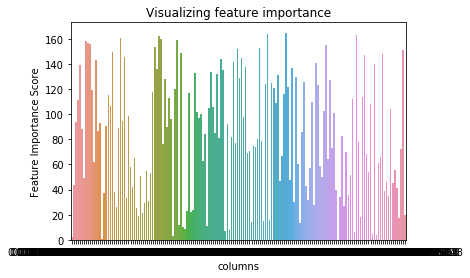

In [20]:
%matplotlib inline
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('columns')
plt.ylabel('Feature Importance Score')
plt.title("Visualizing feature importance")
plt.show()

In [21]:
## generating the model on selected feature
# Split dataset into features and labels
X=data[columns] 
y=data[target]                                       
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.70, random_state=5)

In [22]:
## generate a model on the selected training set features, perform predictions on the selected test set features, 
## and compare actual and predicted values

clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9621130114743451


ALGORITHM 2 - K NEAREST NEIGHBOURS 

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [24]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [25]:
##Evaluating the Algorithm
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[3814   89]
 [ 143  573]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      3903
           1       0.87      0.80      0.83       716

    accuracy                           0.95      4619
   macro avg       0.91      0.89      0.90      4619
weighted avg       0.95      0.95      0.95      4619



In [26]:
# Calculating error for K values between 1 and 40
error = []
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

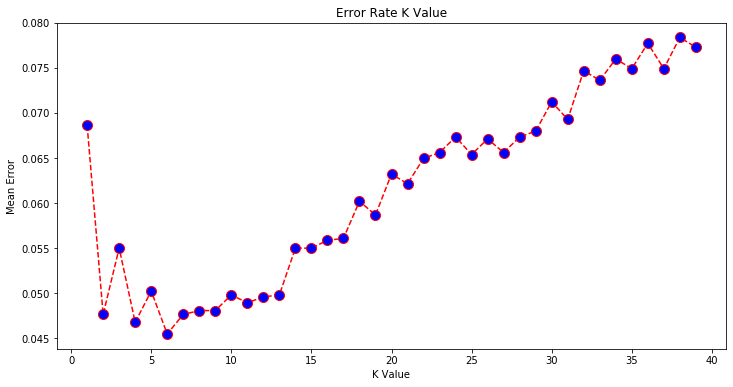

In [27]:
## plot the error values against K values
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40),error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

ALGORITHM 3 - LOGISTIC REGRESSION

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
%matplotlib inline
from sklearn.metrics import plot_confusion_matrix

In [29]:
train_data,test_data, train_label,test_label=train_test_split(X,Y,test_size=0.25)

In [30]:
train_data.shape, test_data.shape, train_label.shape, test_label.shape

((4948, 166), (1650, 166), (4948,), (1650,))

In [31]:
regressor= LogisticRegression()
regressor.fit(train_data, train_label)
predicted_test_label=regressor.predict(test_data)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


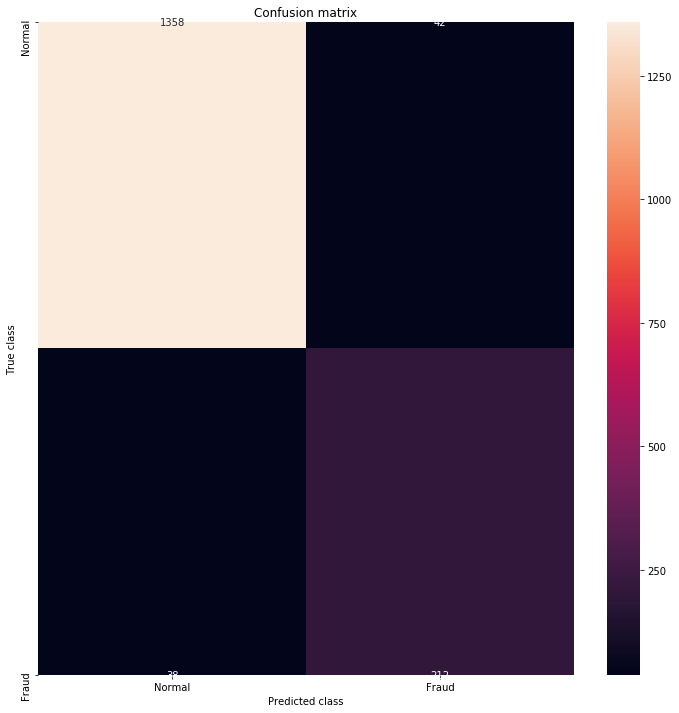

In [32]:
# printing the confusion matrix 
LABELS = ['Normal', 'Fraud'] 
confusion_matrix = metrics.confusion_matrix(test_label, predicted_test_label) 
plt.figure(figsize =(12, 12)) 
sns.heatmap(confusion_matrix, xticklabels = LABELS,  
            yticklabels = LABELS, annot = True, fmt ="d"); 
plt.title("Confusion matrix") 
plt.ylabel('True class') 
plt.xlabel('Predicted class') 
plt.show() 

In [33]:
print("Accuracy:",metrics.accuracy_score(test_label, predicted_test_label))
print("Precision:",metrics.precision_score(test_label, predicted_test_label))
print("Recall:",metrics.recall_score(test_label, predicted_test_label))

Accuracy: 0.9515151515151515
Precision: 0.8346456692913385
Recall: 0.848


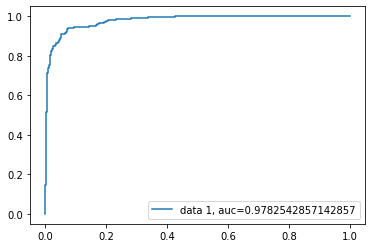

In [34]:
test_predictions= regressor.predict_proba(test_data)[::,1]
fpr, tpr, _ = metrics.roc_curve(test_label,  test_predictions)
auc = metrics.roc_auc_score(test_label,  test_predictions)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

ALGORITHM 4 - SVM

In [35]:
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix  
from sklearn.datasets.samples_generator import make_blobs 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
clf = svm.SVC(kernel='linear',random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
# creating datasets X containing n_samples 
# Y containing two classes 
X, Y = make_blobs(n_samples=500, centers=2, 
                  random_state=0, cluster_std=0.40) 
import matplotlib.pyplot as plt 
# plotting scatters  
plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap='spring'); 
plt.show()  

In [ ]:
# creating line space between -1 to 3.5  
xfit = np.linspace(-1, 3.5) 
  
# plotting scatter 
plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap='spring') 
  
# plot a line between the different sets of data 
for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]: 
    yfit = m * xfit + b 
    plt.plot(xfit, yfit, '-k') 
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',  
    color='#AAAAAA', alpha=0.4) 
  
plt.xlim(-1, 3.5); 
plt.show() 

ALGORITHM 5 - DECISION TREE

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [38]:
classifier= DecisionTreeClassifier(criterion='entropy', random_state=0)  
classifier.fit(X_train, y_train)  

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [39]:
#With Gini-Index
clf_gini = DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=3, min_samples_leaf=5) 
clf_gini.fit(X_train, y_train) 
clf_gini

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=100)

In [40]:
#With entropy
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100,max_depth = 3, min_samples_leaf = 5)  
clf_entropy.fit(X_train, y_train) 
clf_entropy

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=100)

In [41]:
y_pred = classifier.predict(X_test) 
print("Predicted values:") 
print(y_pred) 
y_pred 

Predicted values:
[0 0 0 ... 0 0 0]


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [42]:
def prediction(X_test, clf_object): 
    
    y_pred = clf_object.predict(X_test) 
    print("Predicted values:") 
    print(y_pred) 
    return y_pred 

In [43]:
def cal_accuracy(y_test, y_pred): 
      
    print("Confusion Matrix: ", 
        confusion_matrix(y_test, y_pred)) 
      
    print ("Accuracy : ", 
    accuracy_score(y_test,y_pred)*100) 
      
    print("Report : ", 
    classification_report(y_test, y_pred)) 

In [44]:
# Prediction using Gini-Index
y_pred_gini = prediction(X_test, clf_gini) 
cal_accuracy(y_test, y_pred_gini) 

Predicted values:
[0 0 0 ... 0 0 0]
Confusion Matrix:  [[1669   23]
 [ 158  130]]
Accuracy :  90.85858585858585
Report :                precision    recall  f1-score   support

           0       0.91      0.99      0.95      1692
           1       0.85      0.45      0.59       288

    accuracy                           0.91      1980
   macro avg       0.88      0.72      0.77      1980
weighted avg       0.90      0.91      0.90      1980



In [45]:
# Prediction Using Entropy 
y_pred_entropy = prediction(X_test, clf_entropy) 
cal_accuracy(y_test, y_pred_entropy) 

Predicted values:
[0 0 0 ... 0 1 0]
Confusion Matrix:  [[1653   39]
 [ 150  138]]
Accuracy :  90.45454545454545
Report :                precision    recall  f1-score   support

           0       0.92      0.98      0.95      1692
           1       0.78      0.48      0.59       288

    accuracy                           0.90      1980
   macro avg       0.85      0.73      0.77      1980
weighted avg       0.90      0.90      0.89      1980



In [46]:
X = data.drop('class', axis=1)
y = data['class']

In [47]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [48]:
df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df

,Actual,Predicted
1232,0,0.0
2796,0,0.0
2213,0,0.0
3846,0,0.0
2706,0,0.0
...,...,...
1177,0,0.0
190,1,1.0
5061,0,0.0
462,1,0.0


In [49]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.03737373737373737
Mean Squared Error: 0.03737373737373737
Root Mean Squared Error: 0.19332288373014037
